## Nombre moyen de commentaires par utilisateurs premier niveau

In [ ]:
from pymongo import MongoClient
import json
import os
from dotenv import load_dotenv
load_dotenv()
mongo_url = os.getenv('MONGO_URL') 

client = MongoClient('mongodb://localhost:27017/')
result = client['mooc']['posts_mooc'].aggregate([
    {
        '$group': {
            '_id': None, 
            'avg_comments': {
                '$avg': '$content.comments_count'
            },
            'avg_response': {
                '$avg': '$content.resp_total'
            }
        }
    }, {
        '$project': {
            '_id': 0, 
            'avg_response': 1,
            'avg_comments': 1,
        }
    }
])

# Affichage des résultats
for doc in result:
    print(f"nombre moyen de commentaires : {doc['avg_comments']}, nombre moyen de réponses : {doc['avg_response']}")
client.close()

nombre moyen de commentaires : 2.273674062406648, nombre moyen de réponses : 1.429133965184803


## Nombre moyen de commentaires par utilisateurs de tous niveaux

In [ ]:
from pymongo import MongoClient

# Requires the PyMongo package.
# https://api.mongodb.com/python/current

client = MongoClient('mongodb://localhost:27017/')
result = client['mooc']['documents'].aggregate([
    {
        '$group': {
            '_id': '$username', 
            'nb_message': {
                '$count': {}
            }
        }
    }, {
        '$sort': {
            'nb_message': -1
        }
    }
])

for doc in result:
    print(f"{doc['_id']} : {doc['nb_message']}")

EGo41 : 5948
None : 4758
Vincent-de-Cherbourg : 769
pigret : 759
nabla09 : 692
JPBAUJOT : 645
StellaBachti : 622
LeslieH : 601
IsabellePoirier : 534
bgaultier : 507
stiphaen : 438
sophievm : 401
AM_UBdx : 390
Danibar : 385
benizac : 361
ThierryParmentelat : 359
FrancoiseS : 355
Glenn : 341
gchevrier : 338
Moocdd : 323
DuboisP : 321
wire68 : 319
jcw67 : 313
tuxette : 287
PhilippeSANNOIS : 285
mhuten : 275
AL31 : 273
_Patrick_ : 259
SteveToulouse : 250
TPE : 242
Sylvie_D : 238
CatherineMadrid : 237
Moalic1 : 236
pgille : 235
fduport : 234
ndailly : 229
Nilor : 226
Laetim31 : 219
Murielle1 : 218
vgripon : 215
MichelToulouse31 : 209
scifan : 198
Catline11 : 192
BrutDePomme : 191
sodha : 190
RegisForgione : 188
Fangh : 185
jphzapata : 184
Akatsuki : 184
sofremy : 179
gerard04 : 179
groomy : 173
gillesdumas : 172
fb251 : 169
Ritchie : 166
PhilBonnet : 166
Bruno314 : 165
AstridRosso : 165
Laurence_Cherel : 165
ChristelleMariais : 163
Johanna_Bezeghiche : 162
cathjl : 162
PIERREDEBARD : 159
Re

## Nombre moyen de commentaires par thread par cours

In [35]:
from pymongo import MongoClient
import json

client = MongoClient('mongodb://localhost:27017/')
result = client['mooc']['posts_mooc'].aggregate([
    {
        '$group': {
            '_id': "$content.course_id", 
            'avg_comments': {
                '$avg': '$content.comments_count'
            },
            'avg_response': {
                '$avg': '$content.resp_total'
            }
        }
    }, {
        '$sort': {
            'avg_response': -1
        }
    }
])

# Affichage des résultats
for doc in result:
    print(f"nombre moyen de commentaires pour {doc["_id"]:45} : {doc['avg_comments']}, nombre moyen de réponses : {doc['avg_response']}")
client.close()

nombre moyen de commentaires pour course-v1:MITx+Launch.x_2+2T2016              : 72.1877729257642, nombre moyen de réponses : 63.877729257641924
nombre moyen de commentaires pour course-v1:GIPFTLVIP+137001+session01          : 20.642201834862384, nombre moyen de réponses : 14.81651376146789
nombre moyen de commentaires pour course-v1:grenoblealpes+92009+session01       : 21.82278481012658, nombre moyen de réponses : 9.594936708860759
nombre moyen de commentaires pour course-v1:grenoblealpes+92012+session01       : 24.058823529411764, nombre moyen de réponses : 9.588235294117647
nombre moyen de commentaires pour course-v1:USPC+37003+session02                : 14.625, nombre moyen de réponses : 8.125
nombre moyen de commentaires pour course-v1:umontpellier+08003+session02        : 13.160714285714286, nombre moyen de réponses : 7.321428571428571
nombre moyen de commentaires pour course-v1:USPC+37007+session01                : 18.105263157894736, nombre moyen de réponses : 6.7368421052631

## Total du nombre de cours

In [15]:
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')
result = client['mooc']['posts_mooc'].aggregate([
    {
        '$unwind': {
            'path': '$content.course_id'
        }
    }, {
        '$project': {
            'course_id': '$content.course_id'
        }
    }, {
        '$group': {
            '_id': '$course_id', 
            'taille': {
                '$count': {}
            }
        }
    }, {
        '$project': {
            '_id': 0, 
            'course_id': '$_id', 
            'taille': '$taille'
        }
    }
])

docs = 0
for doc in result:
    docs += 1
print(f"Total cours: {docs}")
client.close()

Total cours: 230


## Date min et max de création et mise à jour

In [7]:
client = MongoClient('mongodb://localhost:27017/')
result = client['mooc']['posts_mooc'].aggregate([
    {
        '$group': {
            '_id': None, 
            'min_date': {
                '$min': '$content.created_at'
            }, 
            'max_date': {
                '$max': '$content.created_at'
            },
            "min_update": {
                '$min': '$content.updated_at'
            },
            "max_update": {
                '$max': '$content.updated_at'
            }
        }
    }, {
        '$project': {
            '_id': 0, 
            'min_date': 1, 
            'max_date': 1,
            'min_update': 1,
            'max_update': 1
        }
    }
])

for doc in result:
    print("date min:", doc['min_date'])
    print("date max:", doc['max_date'])
    print("date min update:", doc['min_update'])
    print("date max update:", doc['max_update'])
    
client.close()

date min: 2014-02-03T07:55:29Z
date max: 2022-06-28T08:17:43Z
date min update: 2014-02-03T07:55:29Z
date max update: 2022-06-28T08:17:43Z


## Nombre max de commentaire pour un thread

In [ ]:
client = MongoClient('mongodb://localhost:27017/')
result = client['mooc']['posts_mooc'].aggregate([
    {
        '$project': {
            'comments_count': {
                '$ifNull': ['$content.comments_count', 0]
            }
        }
    }, {
        '$group': {
            '_id': None, 
            'max_comments_count': {
                '$max': '$comments_count'
            }
        }
    }, {
        '$project': {
            '_id': 0, 
            'max_comments_count': 1
        }
    }
])
for doc in result:
    print("max comments count:", doc['max_comments_count'])

max comments count: 4578


## Date min et max par cours

In [17]:
from pymongo import MongoClient

# Requires the PyMongo package.
# https://api.mongodb.com/python/current

client = MongoClient('mongodb://localhost:27017/')
result = client['mooc']['posts_mooc'].aggregate([
    {
        '$group': {
            '_id': '$content.course_id', 
            'min_create': {
                '$min': '$content.created_at'
            }, 
            'max_create': {
                '$max': '$content.created_at'
            }, 
            'min_update': {
                '$min': '$content.updated_at'
            }, 
            'max_update': {
                '$max': '$content.updated_at'
            }
        }
    }
])

for doc in result:
    print(f"{doc['_id']:80} : {doc['min_create'].split("T")[0]} {doc['max_create'].split("T")[0]} {doc['min_update'].split("T")[0]} {doc['max_update'].split("T")[0]}")

course-v1:education-et-numerique+127001+session01                                : 2017-05-16 2017-07-10 2017-05-16 2017-07-10
course-v1:itii+119002+session02                                                  : 2017-09-18 2017-12-18 2017-09-18 2017-12-18
course-v1:CNAM+01030+session01                                                   : 2018-03-08 2018-05-14 2018-03-08 2018-05-14
course-v1:inria+41003+session03                                                  : 2017-05-11 2017-07-01 2017-05-11 2017-07-01
course-v1:ensae+53001+session02                                                  : 2017-10-10 2017-10-27 2017-10-10 2017-10-27
course-v1:MinesTelecom+04006+session08                                           : 2017-08-23 2018-10-27 2017-08-23 2018-10-27
course-v1:SciencesPo+05009+session01                                             : 2017-10-23 2018-01-08 2017-10-23 2018-01-08
course-v1:ENSCachan+20014+session02                                              : 2017-09-29 2017-12-20 2017-0

## Transfert et dégroupement des messages dans les threads

In [2]:
from pymongo import MongoClient

# Requires the PyMongo package.
# https://api.mongodb.com/python/current

client = MongoClient('mongodb://localhost:27017/')
filter={}
project={
    'content' : 1
}

result = client['mooc']['posts_mooc'].find(
  filter=filter,
  projection=project
)

def stevefunk(content, parent_id=None):
    username = content.get("username", "")
    courseid = content.get("course_id", "")
    id = content.get("id", "")
    
    children = content.get("children", [])
    endorsed_responses = content.get('endorsed_reponses',[])
    non_endorsed_responses = content.get('non_endorsed_reponses',[])
    
    content['_id'] = id
    if content.get("depth", 0) == 1:
        content["parent_id"] = parent_id

    result = client['mooc']['documents'].find_one({'_id' : id})
    if result is None:
        client['mooc']['documents'].insert_one(content)
    
    for doc in children:
        stevefunk(doc, parent_id=id)
    
    for doc in endorsed_responses:
        stevefunk(doc, parent_id=id)

    for doc in non_endorsed_responses:
        stevefunk(doc, parent_id=id)

for doc in result:
    content = doc["content"]
    stevefunk(content)
print("done")

done


## Analyse de la répartition des posts par catégories

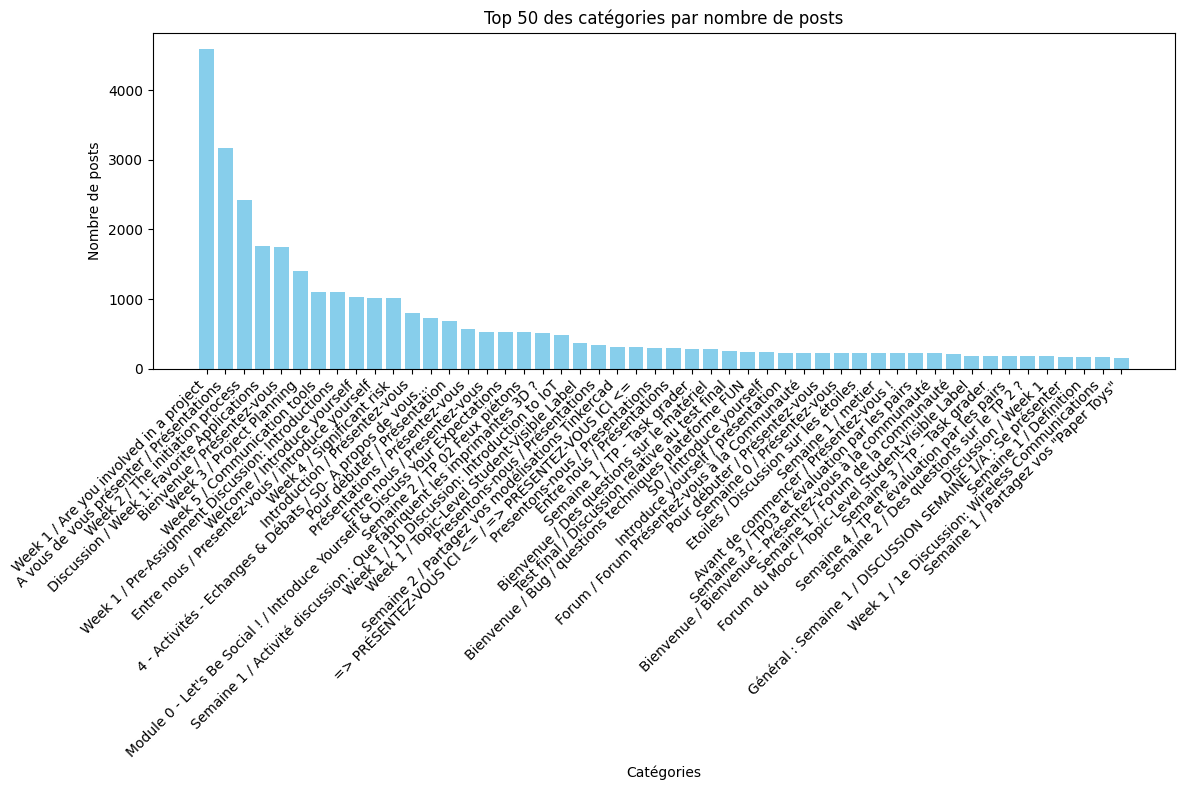

In [5]:
from pymongo import MongoClient
import matplotlib.pyplot as plt

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
result = client['mooc']['posts_mooc'].aggregate([
    {
        '$match': {
        "content.courseware_title": {
            '$exists': True
        }
        }
    },
    {
        '$group': {
            '_id': '$content.courseware_title', 
            'nb': {
                '$count': {}
            }
        }
    },
    {
        '$sort': {
            'nb': -1 
        }
    },
    {
        '$limit': 50 
    }
])

# Préparer les données pour le graphique
categories = []
counts = []

for doc in result:
    categories.append(doc['_id'] if doc['_id'] else 'Inconnu')
    counts.append(doc['nb'])

# Création du graphique
plt.figure(figsize=(12, 8))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Catégories')
plt.ylabel('Nombre de posts')
plt.title('Top 50 des catégories par nombre de posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()

# Fermer la connexion MongoDB
client.close()

# Test d'analyse des sentiments

longueur max des messages : 1987

In [42]:
from transformers import pipeline

# Load the classification pipeline with the specified model
pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

# Classify a new sentence
sentence = """Effectivement, on peut se poser la question. En particulier, au vu de l'attitude de Martine, celle-ci n'aurait-elle pas créé (inconsciemment ?) des conditions d'échec pour maintenir Isabelle dans son statut ? Dans ce cas, il s'agit de maltraitance, (involontaire ?) à mon avis. Et oui, le risque est de créer un vrai climat de malaise là où il n'y a que de l'inconfort pour l'instant. Le remède serait alors pire que le mal, d'autant qu'Isabelle pourrait manquer du recul nécessaire pour en identifier les causes réelles et devenir victime de troubles psycho-sociaux. 
En mettant les choses au pire, on arrive à la conclusion que la réponse à la question est juste pour protéger Isabelle. 
Cependant, prendre cette option a priori ne serait-il pas un raccourci facile ? Martine est-elle vraiment une personne maltraitante ? Rien ne l'indique, de même que rien ne permet de supposer qu'elle manque de l'empathie nécessaire pour corriger son attitude si cela devait être le cas. La maladresse peut être source de maltraitance mais il n'est pas certain pour autant que cette maladresse persiste. De plus, il n'est pas certain qu'Isabelle, seule ou assistée, ne sache pas se défendre. Enfin, tout ce raisonnement est bâti sur l'hypothèse de l'échec d'Isabelle face à la complexité des situations qui lui seraient soumises. Mais sans la confronter à ces difficultés, comment savoir si elle saura les relever ? Selon le principe de Peters, tout humain tend à s'élever à son seuil d'incompétence. Cette confrontation n'est que l'application de ce principe et permettra soit de rassurer Isabelle sur ses capacités, soit à lui permettre de mesurer les savoirs qu'il lui reste à acquérir (voire les acquérir directement), soit la faire souffrir. Sans la connaître, je serai enclin à penser que les probabilités sont en faveur de l'expérience. Mais son être peut fausser ce raisonnement. Faute d'information, je reste donc réellement partagé sur la conduite à tenir.
Mais en tout état de cause, je pense quand même que la question doive être posée, au moins pour rassurer Isabelle sur la bienveillance de Martine à son égard, bien que cela puisse remettre en cause son propre poste. Cette preuve d'honnêteté intellectuelle pourra alors créer un lien de confiance, ce qui pourra permettre à Martine d'être écoutée et comprise lorsqu'elle opposera un refus argumenté à la demande d'avancement."""
result = pipe(sentence[:1987])

# Print the result
print(result)


Device set to use cpu


[{'label': 'Neutral', 'score': 0.663797914981842}]


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

def analyse_sentiment_long_texte(texte, model_name="tabularisai/multilingual-sentiment-analysis", 
                               taille_fenetre=384, chevauchement=128):
    """
    Analyse un long texte en utilisant une fenêtre glissante
    """
    # Charger le tokenizer et le modèle
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    
    # Tokeniser le texte complet
    tokens = tokenizer.encode(texte)
    
    # Si le texte est plus court que la taille de fenêtre maximale
    if len(tokens) <= taille_fenetre:
        inputs = tokenizer(texte, return_tensors="pt", truncation=True, max_length=taille_fenetre)
        with torch.no_grad():
            outputs = model(**inputs)
        
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        label_id = torch.argmax(probs, dim=-1).item()
        score = probs[0, label_id].item()
        
        return {
            "label": model.config.id2label[label_id],
            "score": score,
            "methode": "direct"
        }
    
    # Pour les textes plus longs, utiliser une fenêtre glissante
    scores_segments = []
    labels_segments = []
    
    # Créer des segments qui se chevauchent
    for i in range(0, len(tokens) - 2, taille_fenetre - chevauchement):
        # Extraire un segment de tokens
        segment_tokens = tokens[i:i + taille_fenetre]
        
        # Convertir les tokens en texte
        segment_text = tokenizer.decode(segment_tokens)
        
        # Tokeniser à nouveau pour obtenir les tenseurs d'entrée corrects
        inputs = tokenizer(segment_text, return_tensors="pt", truncation=True)
        
        # Faire l'inférence
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Obtenir les probabilités
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        
        # Stocker les scores et labels pour chaque segment
        for label_id in range(len(model.config.id2label)):
            scores_segments.append(probs[0, label_id].item())
            labels_segments.append(model.config.id2label[label_id])
    
    # Réorganiser les scores par label
    label_scores = {}
    for label, score in zip(labels_segments, scores_segments):
        if label not in label_scores:
            label_scores[label] = []
        label_scores[label].append(score)
    
    # Calculer la moyenne des scores pour chaque label
    avg_scores = {label: np.mean(scores) for label, scores in label_scores.items()}
    
    # Trouver le label avec le score moyen le plus élevé
    final_label = max(avg_scores, key=avg_scores.get)
    final_score = avg_scores[final_label]
    
    return {
        "label": final_label,
        "score": final_score,
        "methode": "fenetre_glissante",
        "details": {
            "segments": len(tokens) // (taille_fenetre - chevauchement) + 1,
            "scores_par_label": avg_scores
        }
    }

# Test avec le texte long
texte_long = """Effectivement, on peut se poser la question. En particulier, au vu de l'attitude de Martine, celle-ci n'aurait-elle pas créé (inconsciemment ?) des conditions d'échec pour maintenir Isabelle dans son statut ? Dans ce cas, il s'agit de maltraitance, (involontaire ?) à mon avis. Et oui, le risque est de créer un vrai climat de malaise là où il n'y a que de l'inconfort pour l'instant. Le remède serait alors pire que le mal, d'autant qu'Isabelle pourrait manquer du recul nécessaire pour en identifier les causes réelles et devenir victime de troubles psycho-sociaux. 
En mettant les choses au pire, on arrive à la conclusion que la réponse à la question est juste pour protéger Isabelle. 
Cependant, prendre cette option a priori ne serait-il pas un raccourci facile ? Martine est-elle vraiment une personne maltraitante ? Rien ne l'indique, de même que rien ne permet de supposer qu'elle manque de l'empathie nécessaire pour corriger son attitude si cela devait être le cas. La maladresse peut être source de maltraitance mais il n'est pas certain pour autant que cette maladresse persiste. De plus, il n'est pas certain qu'Isabelle, seule ou assistée, ne sache pas se défendre. Enfin, tout ce raisonnement est bâti sur l'hypothèse de l'échec d'Isabelle face à la complexité des situations qui lui seraient soumises. Mais sans la confronter à ces difficultés, comment savoir si elle saura les relever ? Selon le principe de Peters, tout humain tend à s'élever à son seuil d'incompétence. Cette confrontation n'est que l'application de ce principe et permettra soit de rassurer Isabelle sur ses capacités, soit à lui permettre de mesurer les savoirs qu'il lui reste à acquérir (voire les acquérir directement), soit la faire souffrir. Sans la connaître, je serai enclin à penser que les probabilités sont en faveur de l'expérience. Mais son être peut fausser ce raisonnement. Faute d'information, je reste donc réellement partagé sur la conduite à tenir.
Mais en tout état de cause, je pense quand même que la question doive être posée, au moins pour rassurer Isabelle sur la bienveillance de Martine à son égard, bien que cela puisse remettre en cause son propre poste. Cette preuve d'honnêteté intellectuelle pourra alors créer un lien de confiance, ce qui pourra permettre à Martine d'être écoutée et comprise lorsqu'elle opposera un refus argumenté à la demande d'avancement."""

resultat = analyse_sentiment_long_texte(texte_long)
print(f"Sentiment: {resultat['label']}")
print(f"Score: {resultat['score']:.4f}")
print(f"Méthode utilisée: {resultat['methode']}")

Token indices sequence length is longer than the specified maximum sequence length for this model (609 > 512). Running this sequence through the model will result in indexing errors


Nombre total de tokens: 609
Sentiment: Neutral
Score: 0.4590
Méthode utilisée: fenetre_glissante
Détails:
  - Very Negative: 0.1954
  - Negative: 0.1871
  - Neutral: 0.4590
  - Positive: 0.0993
  - Very Positive: 0.0592


In [49]:
pipe = pipeline("text-classification", model="DT12the/distilbert-sentiment-analysis")

client = MongoClient('mongodb://localhost:27017/')
result = client['mooc']['documents'].find().limit(1000)

for doc in result:
    message = doc.get("body", "")
    if message == "":
        continue
    resultat = analyse_sentiment_long_texte(message)
    print(f"Sentiment: {resultat['label']}")
    print(f"Score: {resultat['score']:.4f}")
    print(f"Méthode utilisée: {resultat['methode']}")

Device set to use cpu


Nombre total de tokens: 94
Sentiment: Neutral
Score: 0.6111
Méthode utilisée: direct
Nombre total de tokens: 59
Sentiment: Neutral
Score: 0.6134
Méthode utilisée: direct
Nombre total de tokens: 89
Sentiment: Neutral
Score: 0.4878
Méthode utilisée: direct
Nombre total de tokens: 105
Sentiment: Very Positive
Score: 0.3961
Méthode utilisée: direct
Nombre total de tokens: 83
Sentiment: Neutral
Score: 0.8321
Méthode utilisée: direct
Nombre total de tokens: 65
Sentiment: Very Positive
Score: 0.2561
Méthode utilisée: direct
Nombre total de tokens: 208
Sentiment: Very Positive
Score: 0.7764
Méthode utilisée: direct
Nombre total de tokens: 117
Sentiment: Very Positive
Score: 0.4498
Méthode utilisée: direct
Nombre total de tokens: 69
Sentiment: Positive
Score: 0.6037
Méthode utilisée: direct
Nombre total de tokens: 27
Sentiment: Positive
Score: 0.5034
Méthode utilisée: direct
Nombre total de tokens: 15
Sentiment: Neutral
Score: 0.5765
Méthode utilisée: direct
Nombre total de tokens: 31
Sentiment

Token indices sequence length is longer than the specified maximum sequence length for this model (609 > 512). Running this sequence through the model will result in indexing errors


Nombre total de tokens: 609
Sentiment: Neutral
Score: 0.4590
Méthode utilisée: fenetre_glissante
Nombre total de tokens: 56
Sentiment: Neutral
Score: 0.3253
Méthode utilisée: direct
Nombre total de tokens: 95
Sentiment: Negative
Score: 0.5563
Méthode utilisée: direct
Nombre total de tokens: 147
Sentiment: Neutral
Score: 0.4693
Méthode utilisée: direct
Nombre total de tokens: 183
Sentiment: Very Positive
Score: 0.4122
Méthode utilisée: direct
Nombre total de tokens: 95
Sentiment: Neutral
Score: 0.4923
Méthode utilisée: direct
Nombre total de tokens: 66
Sentiment: Very Positive
Score: 0.6352
Méthode utilisée: direct
Nombre total de tokens: 27
Sentiment: Very Positive
Score: 0.7781
Méthode utilisée: direct
Nombre total de tokens: 64
Sentiment: Very Negative
Score: 0.5415
Méthode utilisée: direct
Nombre total de tokens: 55
Sentiment: Very Positive
Score: 0.5805
Méthode utilisée: direct
Nombre total de tokens: 87
Sentiment: Positive
Score: 0.4617
Méthode utilisée: direct
Nombre total de tok

Token indices sequence length is longer than the specified maximum sequence length for this model (596 > 512). Running this sequence through the model will result in indexing errors


Nombre total de tokens: 596
Sentiment: Neutral
Score: 0.4383
Méthode utilisée: fenetre_glissante
Nombre total de tokens: 366
Sentiment: Neutral
Score: 0.4994
Méthode utilisée: direct
Nombre total de tokens: 314
Sentiment: Neutral
Score: 0.8817
Méthode utilisée: direct
Nombre total de tokens: 163
Sentiment: Neutral
Score: 0.7310
Méthode utilisée: direct
Nombre total de tokens: 150
Sentiment: Very Positive
Score: 0.5236
Méthode utilisée: direct
Nombre total de tokens: 247
Sentiment: Neutral
Score: 0.6880
Méthode utilisée: direct
Nombre total de tokens: 256
Sentiment: Neutral
Score: 0.7401
Méthode utilisée: direct
Nombre total de tokens: 454
Sentiment: Neutral
Score: 0.4741
Méthode utilisée: fenetre_glissante
Nombre total de tokens: 202
Sentiment: Neutral
Score: 0.6891
Méthode utilisée: direct
Nombre total de tokens: 132
Sentiment: Neutral
Score: 0.3874
Méthode utilisée: direct
Nombre total de tokens: 58
Sentiment: Very Negative
Score: 0.3900
Méthode utilisée: direct
Nombre total de token

Token indices sequence length is longer than the specified maximum sequence length for this model (596 > 512). Running this sequence through the model will result in indexing errors


Nombre total de tokens: 596
Sentiment: Neutral
Score: 0.4383
Méthode utilisée: fenetre_glissante
Nombre total de tokens: 214
Sentiment: Neutral
Score: 0.6254
Méthode utilisée: direct
Nombre total de tokens: 481
Sentiment: Neutral
Score: 0.6185
Méthode utilisée: fenetre_glissante
Nombre total de tokens: 13
Sentiment: Positive
Score: 0.3690
Méthode utilisée: direct
Nombre total de tokens: 139
Sentiment: Positive
Score: 0.4973
Méthode utilisée: direct
Nombre total de tokens: 10
Sentiment: Neutral
Score: 0.2286
Méthode utilisée: direct
Nombre total de tokens: 167
Sentiment: Neutral
Score: 0.4831
Méthode utilisée: direct
Nombre total de tokens: 8
Sentiment: Neutral
Score: 0.6395
Méthode utilisée: direct
Nombre total de tokens: 126
Sentiment: Neutral
Score: 0.6206
Méthode utilisée: direct
Nombre total de tokens: 66
Sentiment: Very Negative
Score: 0.4309
Méthode utilisée: direct
Nombre total de tokens: 57
Sentiment: Neutral
Score: 0.7100
Méthode utilisée: direct
Nombre total de tokens: 142
Se

Token indices sequence length is longer than the specified maximum sequence length for this model (531 > 512). Running this sequence through the model will result in indexing errors


Nombre total de tokens: 531
Sentiment: Neutral
Score: 0.3619
Méthode utilisée: fenetre_glissante
Nombre total de tokens: 40
Sentiment: Very Negative
Score: 0.5795
Méthode utilisée: direct
Nombre total de tokens: 225
Sentiment: Negative
Score: 0.4555
Méthode utilisée: direct
Nombre total de tokens: 101
Sentiment: Negative
Score: 0.2892
Méthode utilisée: direct
Nombre total de tokens: 61
Sentiment: Neutral
Score: 0.5746
Méthode utilisée: direct
Nombre total de tokens: 225
Sentiment: Negative
Score: 0.5068
Méthode utilisée: direct


Token indices sequence length is longer than the specified maximum sequence length for this model (689 > 512). Running this sequence through the model will result in indexing errors


Nombre total de tokens: 689
Sentiment: Neutral
Score: 0.5923
Méthode utilisée: fenetre_glissante
Nombre total de tokens: 209
Sentiment: Very Negative
Score: 0.3965
Méthode utilisée: direct
Nombre total de tokens: 82
Sentiment: Neutral
Score: 0.6117
Méthode utilisée: direct
Nombre total de tokens: 55
Sentiment: Negative
Score: 0.4345
Méthode utilisée: direct
Nombre total de tokens: 238
Sentiment: Very Negative
Score: 0.4431
Méthode utilisée: direct
Nombre total de tokens: 139
Sentiment: Very Negative
Score: 0.6668
Méthode utilisée: direct
Nombre total de tokens: 55
Sentiment: Neutral
Score: 0.3243
Méthode utilisée: direct
Nombre total de tokens: 422
Sentiment: Neutral
Score: 0.8949
Méthode utilisée: fenetre_glissante
Nombre total de tokens: 50
Sentiment: Very Negative
Score: 0.5004
Méthode utilisée: direct
Nombre total de tokens: 44
Sentiment: Positive
Score: 0.4805
Méthode utilisée: direct
Nombre total de tokens: 15
Sentiment: Very Negative
Score: 0.5062
Méthode utilisée: direct
Nombre

#